<a href="https://colab.research.google.com/github/RahulRajGiri15/Plant-Disease-Detection/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello Rahul!")

Hello Rahul!


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Importing Libraries

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!git clone https://github.com/RahulRajGiri15/Plant-Disease-Detection

Cloning into 'Plant-Disease-Detection'...
remote: Enumerating objects: 87928, done.
remote: Total 87928 (delta 0), reused 0 (delta 0), pack-reused 87928 (from 2)
Receiving objects: 100% (87928/87928), 1.31 GiB | 16.30 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Updating files: 100% (87902/87902), done.


In [5]:
!ls Plant-Disease-Detection

requirement.txt  test  train  valid


# Data **preProcessing**

In [6]:

training_set = tf.keras.utils.image_dataset_from_directory(
    "/content/Plant-Disease-Detection/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)
print("Dataset successfully loaded!")

Found 70295 files belonging to 38 classes.
Dataset successfully loaded!


# Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/Plant-Disease-Detection/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


print("Validation dataset successfully loaded!")

Found 17572 files belonging to 38 classes.
Validation dataset successfully loaded!


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    # x is training set and y is label
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 96.5   96.5   98.5 ]
   [ 95.    95.    97.  ]
   [ 89.    89.    91.  ]
   ...
   [ 86.75  90.75  91.75]
   [ 89.75  93.75  94.75]
   [ 79.75  83.75  84.75]]

  [[ 86.75  86.75  88.75]
   [102.25 102.25 104.25]
   [ 93.25  93.25  95.25]
   ...
   [ 82.    86.    87.  ]
   [ 86.25  90.25  91.25]
   [ 91.75  95.75  96.75]]

  [[ 96.75  96.75  98.75]
   [ 90.5   90.5   92.5 ]
   [ 93.75  93.75  95.75]
   ...
   [ 92.    96.    97.  ]
   [ 81.    85.    86.  ]
   [111.5  115.5  116.5 ]]

  ...

  [[129.75 127.75 132.75]
   [137.   135.   140.  ]
   [134.   132.   137.  ]
   ...
   [148.5  146.5  151.5 ]
   [137.5  135.5  140.5 ]
   [140.25 138.25 143.25]]

  [[133.75 131.75 136.75]
   [146.25 144.25 149.25]
   [137.   135.   140.  ]
   ...
   [150.5  148.5  153.5 ]
   [154.5  152.5  157.5 ]
   [149.5  147.5  152.5 ]]

  [[129.   127.   132.  ]
   [135.   133.   138.  ]
   [136.5  134.5  139.5 ]
   ...
   [148.25 146.25 151.25]
   [147.25 145.25 150.25]
   [134.75 132.75 13

# Building Model

In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.models import Sequential


In [11]:
model = Sequential()

In [12]:
## Building convolution layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25))  # To avoid Overfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
#output layer

model.add(Dense(units=38,activation='softmax'))

In [23]:
#model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#   learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

# Compiling Model

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [26]:
training_history = model.fit(x = training_set,validation_data = validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 68ms/step - accuracy: 0.3810 - loss: 2.2128 - val_accuracy: 0.8380 - val_loss: 0.5112
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 147s 67ms/step - accuracy: 0.8341 - loss: 0.5341 - val_accuracy: 0.9169 - val_loss: 0.2632
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 63ms/step - accuracy: 0.9077 - loss: 0.2860 - val_accuracy: 0.9285 - val_loss: 0.2198
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0.9351 - loss: 0.1947 - val_accuracy: 0.9422 - val_loss: 0.1820
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - accuracy: 0.9525 - loss: 0.1457 - val_accuracy: 0.9434 - val_loss: 0.1835
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.9645 - loss: 0.1124 - val_accuracy: 0.9522 - val_loss: 0.1572
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9704 - loss: 0.0909 - val_accuracy: 0.9454 - val_loss: 0.1821
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 

# Model Evalution

In [27]:
# Model Evalution on traning set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9776 - loss: 0.0716


In [28]:
print('Training accuracy:', train_acc)
print('Training Loss:', train_loss)

Training accuracy: 0.9793726205825806
Training Loss: 0.06591769307851791


In [29]:
# Model on validation set
val_loss, val_acc = model.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9447 - loss: 0.1925


In [30]:
print('Validation accuracy:', val_acc)
print('Validation loss:', val_loss)

Validation accuracy: 0.9464489221572876
Validation loss: 0.18943549692630768


In [31]:
!cd Plant-Disease-Detection

In [32]:
!pwd


/content


# Saving Model

In [33]:
model.save('trained_model.keras')

In [34]:
model.save('trained_model.h5')

In [35]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5870261192321777,
  0.8599188923835754,
  0.9157977104187012,
  0.9407070279121399,
  0.9561704397201538,
  0.9656732082366943,
  0.9722740054130554,
  0.9756881594657898,
  0.9794011116027832,
  0.9825023412704468],
 'loss': [1.4118120670318604,
  0.4477139413356781,
  0.2590459883213043,
  0.17969676852226257,
  0.1345619410276413,
  0.1058574765920639,
  0.08342041820287704,
  0.07385329157114029,
  0.0644192099571228,
  0.054572705179452896],
 'val_accuracy': [0.8380377888679504,
  0.9168563485145569,
  0.928465723991394,
  0.9421807527542114,
  0.943375825881958,
  0.9521966576576233,
  0.9453676342964172,
  0.9582290053367615,
  0.9636922478675842,
  0.9464489221572876],
 'val_loss': [0.5112062096595764,
  0.2632184624671936,
  0.21982848644256592,
  0.18200744688510895,
  0.18352216482162476,
  0.15718954801559448,
  0.18208055198192596,
  0.1389581263065338,
  0.13034439086914062,
  0.18943555653095245]}

In [36]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [37]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Accuracy **Visulization**

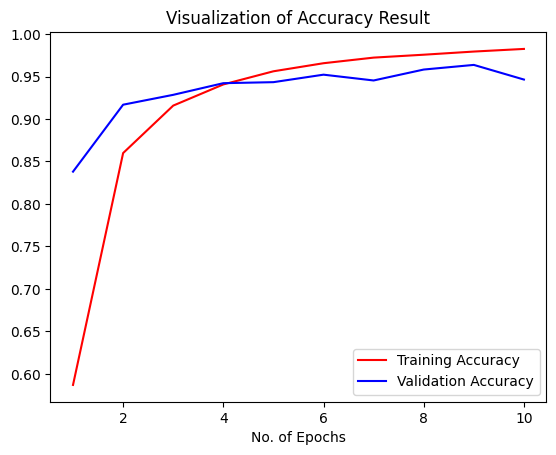

In [40]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Classification (othor model)

In [41]:
class_name = validation_set.class_names

In [55]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

NotFoundError: Could not find directory valid

# Predictions.

In [43]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

NameError: name 'test_set' is not defined

In [44]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

NameError: name 'test_set' is not defined

In [45]:
Y_true

NameError: name 'Y_true' is not defined

In [46]:
predicted_categories

NameError: name 'predicted_categories' is not defined

## Classification Report

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

NameError: name 'Y_true' is not defined

In [48]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

NameError: name 'Y_true' is not defined

In [49]:
# Precision =(TP/(TP+FP))
# Recall =(TP/(TP+FN))
# Accuracy =((TP+TN)/(TP+TN+FP+FN))
# f1-score = Harmonic mean of Precision and Recall

In [50]:
# pred = model.predict(testds)
# pred = [np.argmax(i) for i in pred]
# y_test = testds.classes
# print(classification_report(pred,y_test))

# Confusion Matrix

In [51]:
cm = confusion_matrix(Y_true,predicted_categories)

NameError: name 'Y_true' is not defined

In [52]:
cm

NameError: name 'cm' is not defined

In [53]:
cm.shape

NameError: name 'cm' is not defined

In [54]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

NameError: name 'cm' is not defined

<Figure size 4000x4000 with 0 Axes>